# Task
The task is to create a machine learning model, trained on the training set, to
predict the weekly disease counts on the test set. There are several approaches
to this task, feel free to be creative.

Target column - 12

# Load

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_set = pd.read_csv('data/training_set.csv', delimiter=';', header=None)
test_set = pd.read_csv('data/test_set.csv', delimiter=';', header=None)

In [3]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2009-01-05 00:00:00,14.0,3.0,3.0,9.0,55.0,0.0,0.0,19.0,41.0,16.0,24.0,9
1,2009-01-12 00:00:00,13.0,0.0,3.0,4.0,43.0,0.0,0.0,19.0,37.0,12.0,19.0,15
2,2009-01-19 00:00:00,13.0,1.0,8.0,6.0,32.0,1.0,0.0,19.0,44.0,5.0,31.0,20
3,2009-01-26 00:00:00,17.0,2.0,17.0,4.0,59.0,2.0,0.0,22.0,40.0,8.0,15.0,51
4,2009-02-02 00:00:00,15.0,3.0,3.0,5.0,58.0,0.0,0.0,28.0,41.0,5.0,27.0,51


In [4]:
test_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,2014-06-02 00:00:00,9.0,2.0,2.0,0.0,11.0,1.0,0.0,10.0,15.0,6.0,1.0
1,2014-06-09 00:00:00,10.0,1.0,3.0,4.0,16.0,0.0,0.0,7.0,46.0,2.0,4.0
2,2014-06-16 00:00:00,6.0,2.0,0.0,1.0,10.0,0.0,0.0,8.0,20.0,1.0,4.0
3,2014-06-23 00:00:00,28.0,1.0,4.0,2.0,8.0,0.0,0.0,5.0,17.0,9.0,3.0
4,2014-06-30 00:00:00,8.0,4.0,0.0,1.0,13.0,0.0,0.0,3.0,12.0,5.0,7.0


In [5]:
train_set.rename(columns={0: 'time', 12: 'target'}, inplace = True)
test_set.rename(columns={0: 'time'}, inplace = True)


# EDA

## Fast overview over all data
nans

In [6]:
train_set.replace('None', np.nan, inplace=True)
train_set.isnull().sum()

time      0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
target    0
dtype: int64

In [7]:
test_set.replace('None', np.nan, inplace=True)
test_set.isnull().sum()

time    0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
dtype: int64

## Fast statistics

In [8]:
train_set.describe().T

,count,mean,std,min,25%,50%,75%,max
1,282.0,8.741135,4.403211,0.0,6.0,8.0,11.00,25.0
2,282.0,1.599291,1.589243,0.0,1.0,1.0,2.00,12.0
3,282.0,11.099291,28.211909,0.0,1.0,4.0,9.00,297.0
4,282.0,3.450355,3.562260,0.0,1.0,3.0,4.00,22.0
5,282.0,24.812057,24.315910,2.0,14.0,21.0,27.00,232.0
6,282.0,0.585106,1.094238,0.0,0.0,0.0,1.00,11.0
7,282.0,0.265957,0.556595,0.0,0.0,0.0,0.00,2.0
8,282.0,9.542553,7.052419,0.0,4.0,8.0,12.00,49.0
9,282.0,20.177305,9.279974,2.0,14.0,19.0,26.00,53.0
10,282.0,10.528369,19.648900,0.0,4.0,7.0,10.00,239.0


In [9]:
test_set.describe().T

,count,mean,std,min,25%,50%,75%,max
1,52.0,7.826923,4.492788,0.0,5.75,7.5,10.00,28.0
2,52.0,1.153846,1.177978,0.0,0.00,1.0,1.25,4.0
3,52.0,1.923077,1.988656,0.0,1.00,1.0,2.25,8.0
4,52.0,1.596154,1.485348,0.0,1.00,1.0,3.00,6.0
5,52.0,10.903846,4.863871,0.0,8.00,11.0,13.00,24.0
6,52.0,0.384615,0.661367,0.0,0.00,0.0,1.00,3.0
7,52.0,0.115385,0.322603,0.0,0.00,0.0,0.00,1.0
8,52.0,4.384615,2.730753,0.0,2.00,4.0,6.00,11.0
9,52.0,12.461538,6.789443,0.0,9.00,12.0,15.00,46.0
10,52.0,3.980769,2.244736,0.0,2.00,4.0,6.00,9.0


## Plot number of unique values


In [10]:
def plot_nunique(df):
    ''' 
    Plot hist number of unique elements for each column
    '''
    nunique = df.nunique(dropna=False)
    plt.figure(figsize=(10,6))
    _ = plt.hist(nunique.astype(float)/df.shape[0], bins=30)
    plt.show()

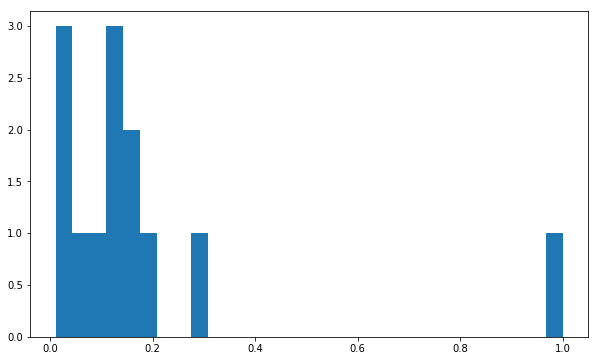

In [11]:
plot_nunique(train_set)

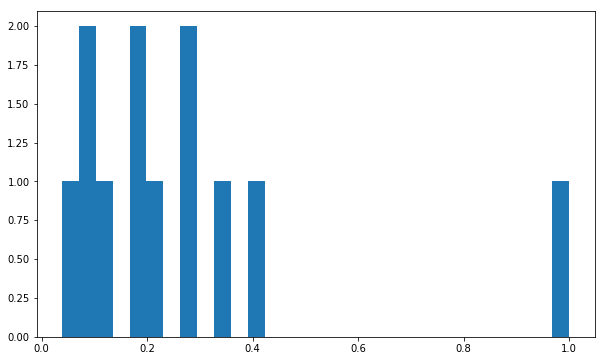

In [12]:
plot_nunique(test_set)

## Plot duplicates

In [13]:
def plot_duplicates(df):
    ''' 
    Plot hist number of duplicated elements for each column
    '''
    result = {col: df.duplicated([col]).sum() for col in df.columns}
    plt.figure(figsize=(6,8))
    plt.barh([str(key) for key in result.keys()], list(result.values()), color='g', alpha=0.5)
    plt.show()

Train set:


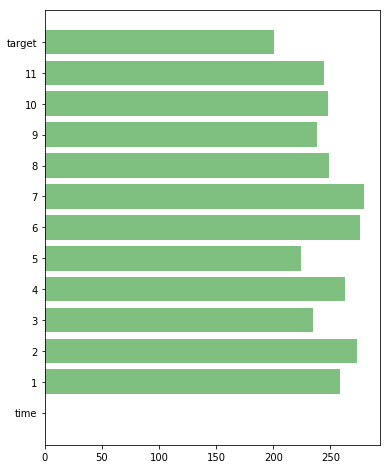

Test set:


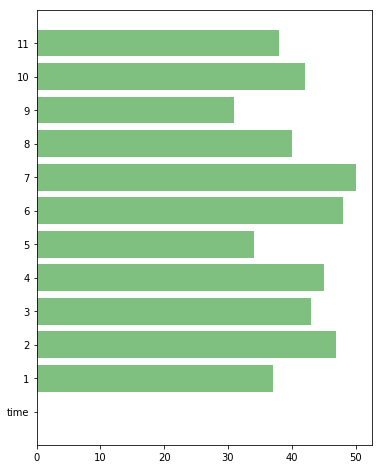

In [14]:
print ('Train set:')
plot_duplicates(train_set)

print ('Test set:')
plot_duplicates(test_set)

## Time features extraction

In [15]:
import time

In [16]:
def time_ext(df):
    df['tm_year'] = df['time'].apply(lambda x: time.strptime(str(x), '%Y-%m-%d %H:%M:%S')[0])
    df['tm_mon'] = df['time'].apply(lambda x:  time.strptime(str(x), '%Y-%m-%d %H:%M:%S')[1])
    df['tm_mday'] = df['time'].apply(lambda x: time.strptime(str(x), '%Y-%m-%d %H:%M:%S')[2])
    df['tm_yday'] = df['time'].apply(lambda x: time.strptime(str(x), '%Y-%m-%d %H:%M:%S')[7])
    
    df['time'] = pd.to_datetime(df['time'])
    return df

In [17]:
test_set = time_ext(test_set)
train_set = time_ext(train_set)

## Values counts

In [18]:
import os

In [19]:
def hist(data, name, col, count, dir_name, show):
    '''
    data - value counts Series
    name - additional name for your plot
    count - the shape of value counts
    dir_name - additional directory for plot
    show - plot show or not
    '''
    plt.close()
    plt.figure(figsize=(6,8))
    plt.barh(data.index, data.values, color='g', alpha=0.6)
    plt.xlabel('Count')
    plt.ylabel('Top 15 values of ' + str(count))
    plt.title(col)
    
    if dir_name is not None:
        if dir_name not in os.listdir('plot'):
            os.mkdir('plot/' + dir_name+'/')
        plt.savefig('plot/' + dir_name+ '/' + name + "_test_" + col + ".png")
    else:
        plt.savefig(f'plot/{name}_test_{col}.png')

    if show == True:
        plt.show()
    else:
        plt.ioff()
        plt.close()

def val_count(df, m_plot = False, name = 'Test', dir_name = None, show = True):
    ''' 
    
    Vizualize count of top 15 values in each column of the inputed DataFrame.
    
    m_plot: bool([True, False]), show pd.Series value count for each column. Saving each plot;
    name: str(), additional name for plot (if m_plot = True);
    dir_name: str(), default(None), additional directory for your plots;
    show: bool([True, False]), show your plot in notebook
    
    '''
    
    for col in df.columns:
        if col != 'message_encoding':
            if m_plot == False:
                print (df[col].value_counts().head(15))
                print ('Column val_count ' + str(col) + ' shape: ' + str(df[col].value_counts().shape))
            else:
                hist(df[col].value_counts().head(15), name, col, df[col].value_counts().shape[0], dir_name, show)
                plt.close()

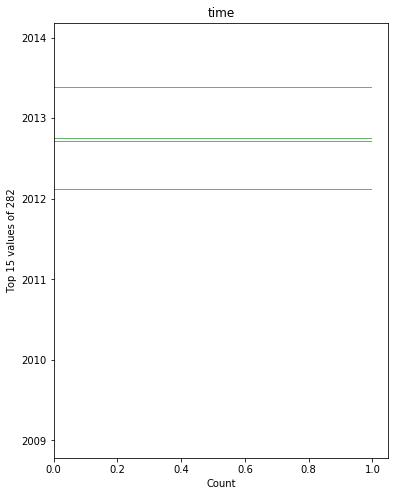

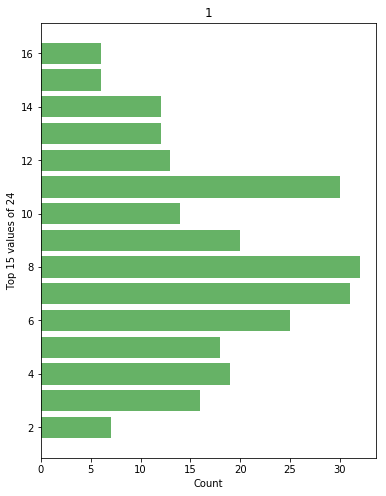

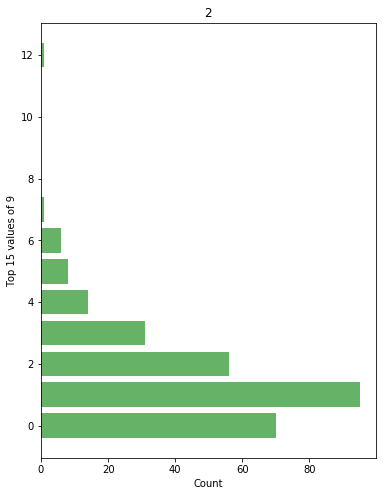

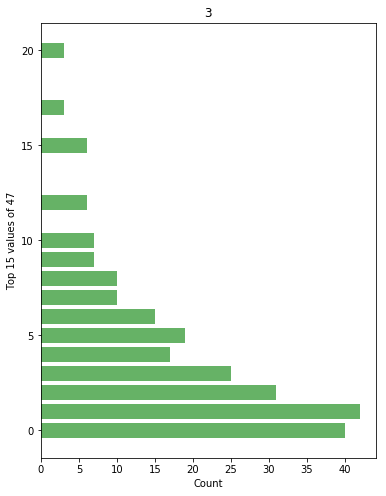

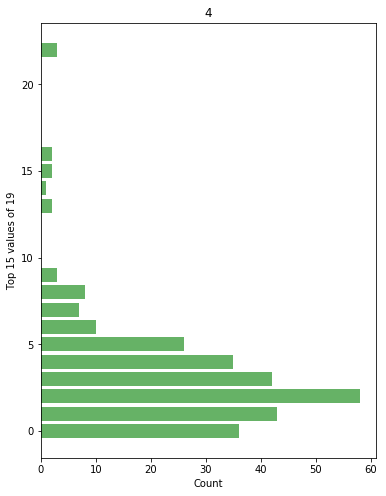

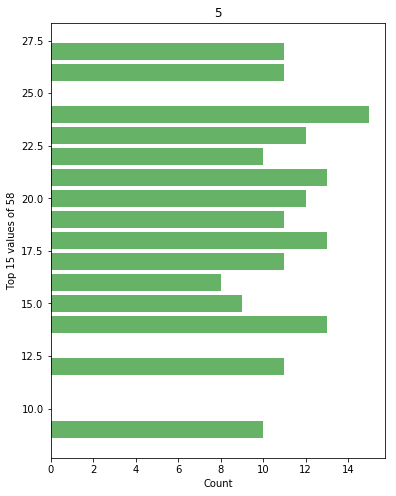

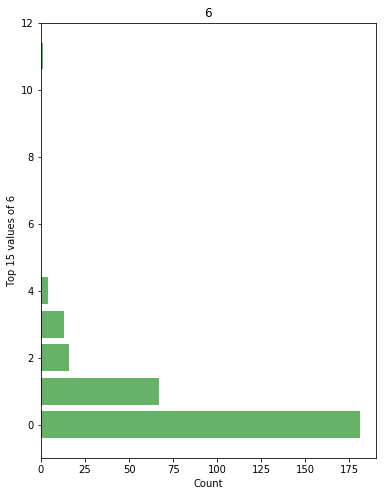

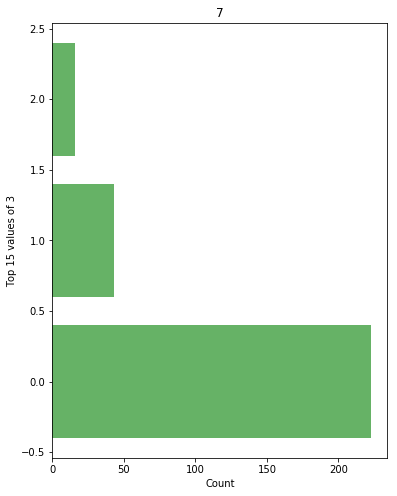

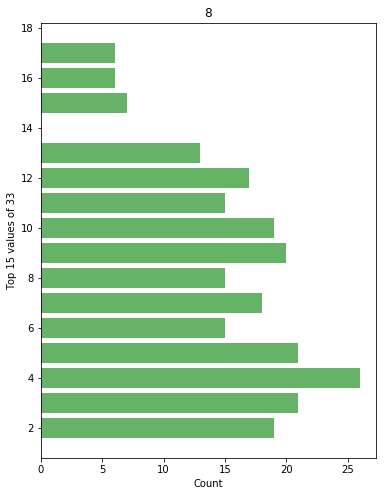

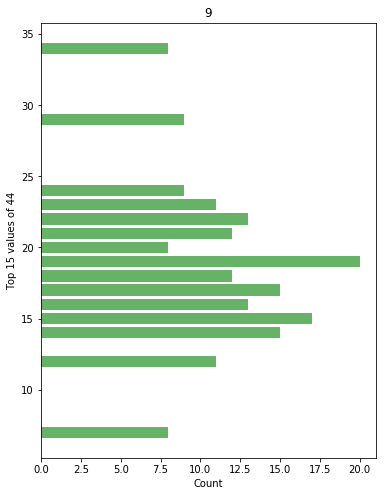

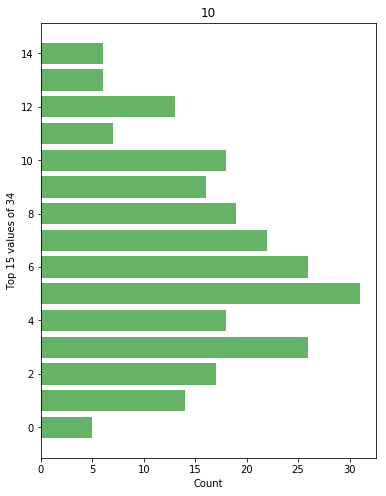

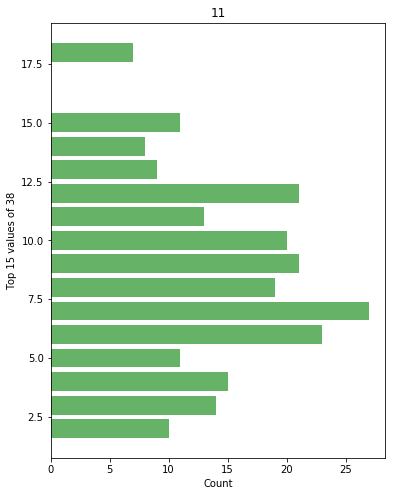

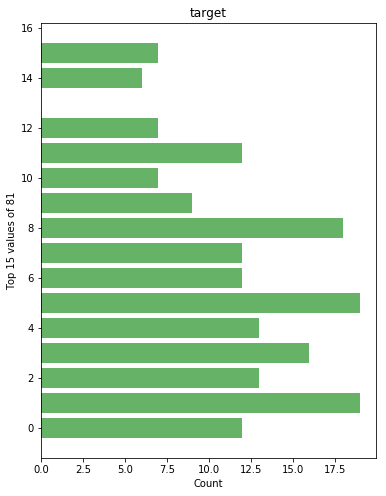

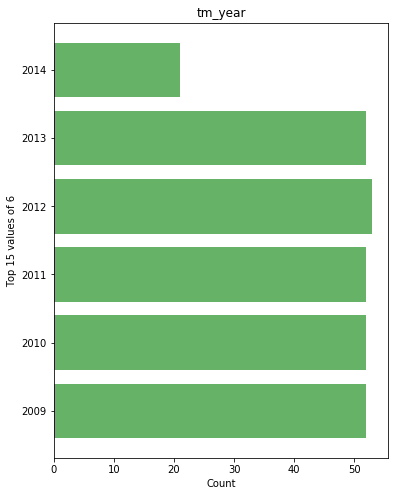

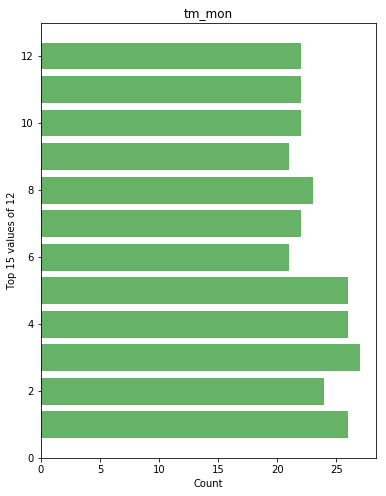

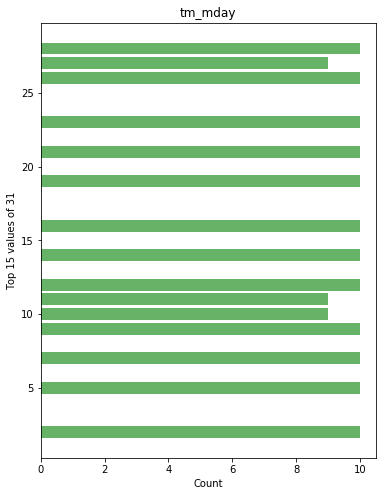

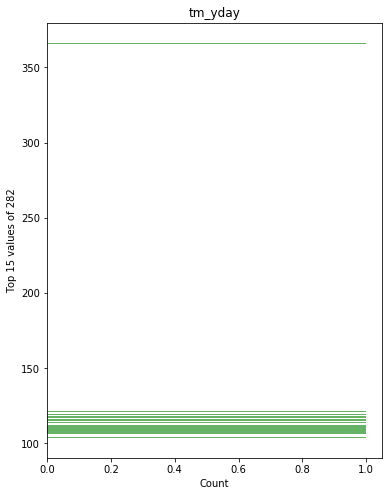

In [20]:
val_count(train_set,m_plot = True, show = True)

In [21]:
val_count(train_set)

2009-11-02    1
2010-11-22    1
2013-12-09    1
2012-09-17    1
2011-06-27    1
2009-01-12    1
2013-05-06    1
2012-02-13    1
2009-08-31    1
2010-11-08    1
2013-01-21    1
2012-10-01    1
2010-04-19    1
2009-01-26    1
2013-05-20    1
Name: time, dtype: int64
Column val_count time shape: (282,)
8.0     32
7.0     31
11.0    30
6.0     25
9.0     20
4.0     19
5.0     18
3.0     16
10.0    14
12.0    13
13.0    12
14.0    12
2.0      7
16.0     6
15.0     6
Name: 1, dtype: int64
Column val_count 1 shape: (24,)
1.0     95
0.0     70
2.0     56
3.0     31
4.0     14
5.0      8
6.0      6
12.0     1
7.0      1
Name: 2, dtype: int64
Column val_count 2 shape: (9,)
1.0     42
0.0     40
2.0     31
3.0     25
5.0     19
4.0     17
6.0     15
7.0     10
8.0     10
10.0     7
9.0      7
12.0     6
15.0     6
20.0     3
17.0     3
Name: 3, dtype: int64
Column val_count 3 shape: (47,)
2.0     58
1.0     43
3.0     42
0.0     36
4.0     35
5.0     26
6.0     10
8.0      8
7.0      7
9.0      3

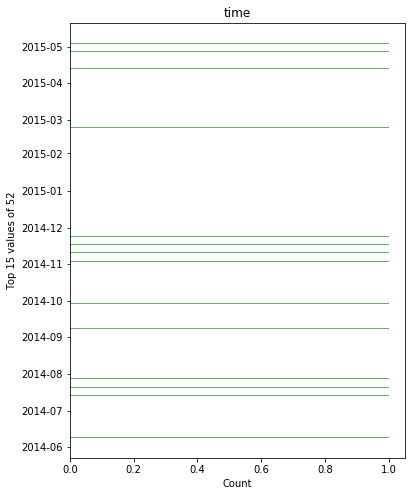

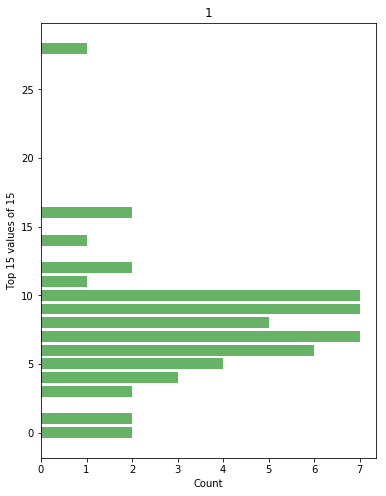

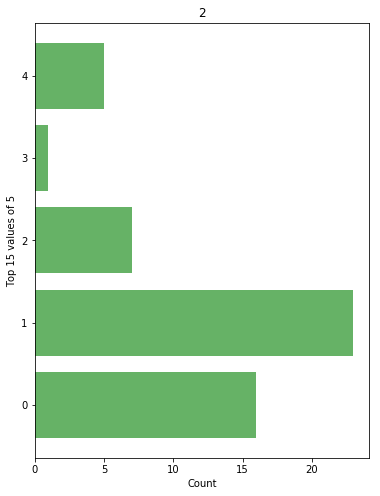

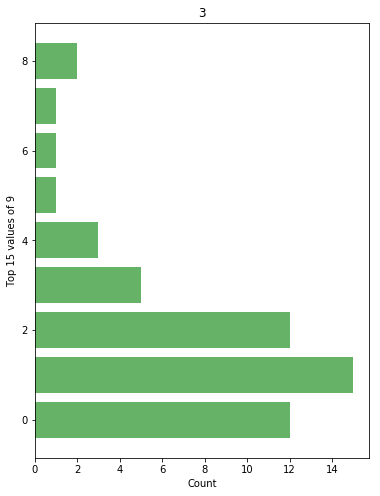

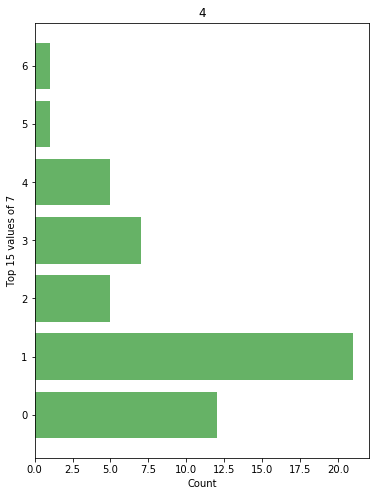

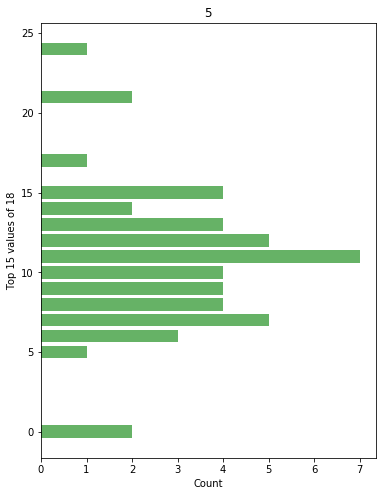

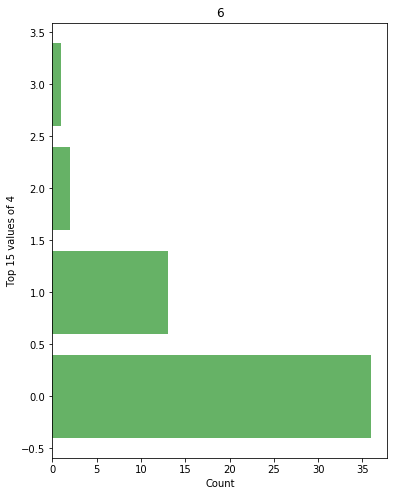

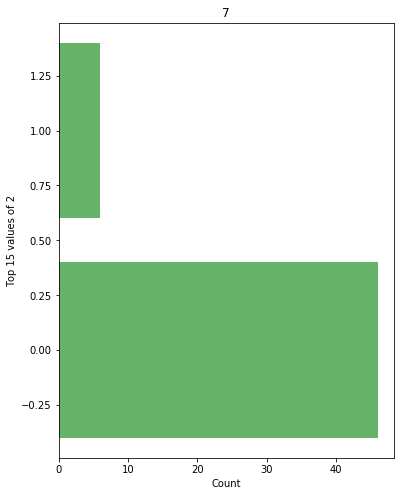

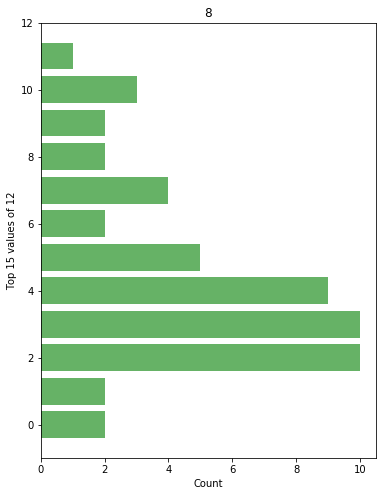

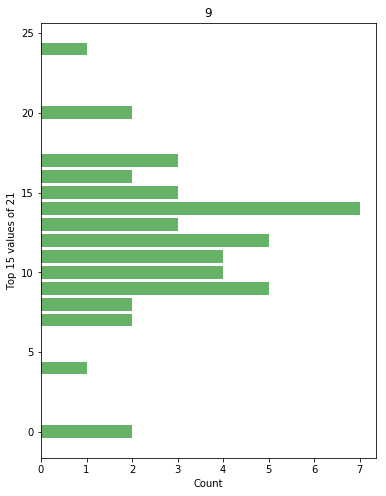

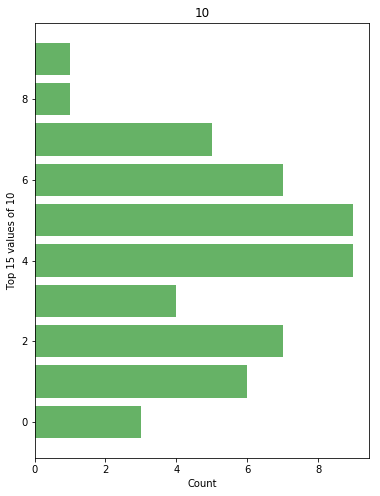

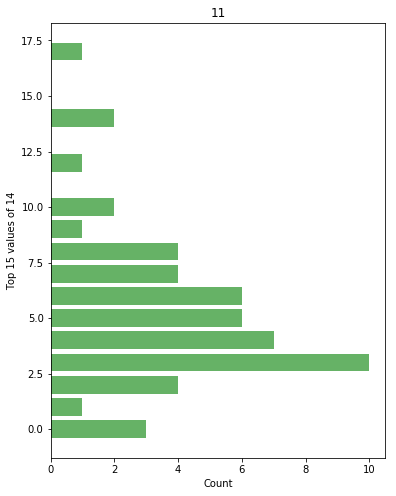

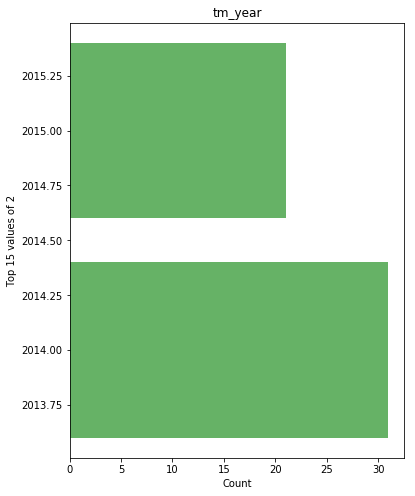

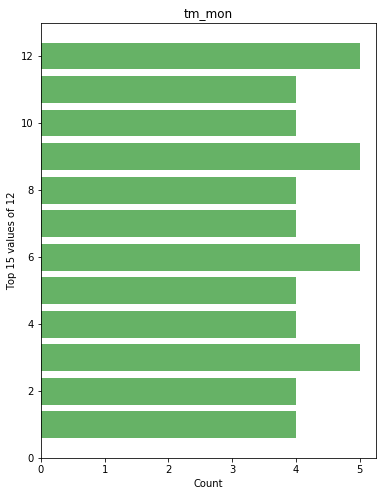

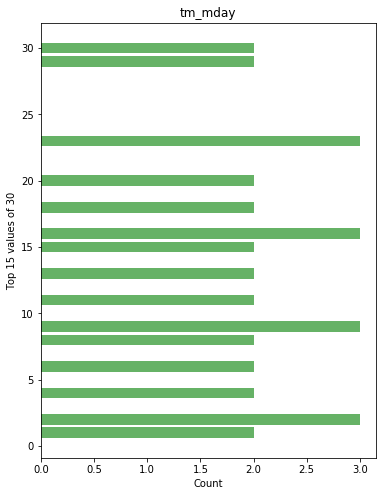

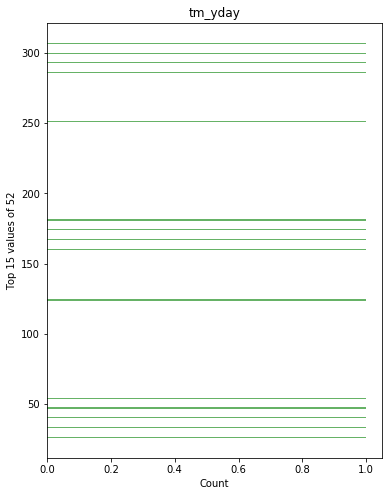

In [22]:
val_count(test_set, m_plot = True, show = True)

In [23]:
val_count(test_set)

2015-04-27    1
2014-06-09    1
2014-11-24    1
2014-09-08    1
2014-07-28    1
2014-11-17    1
2014-09-29    1
2015-04-13    1
2014-07-21    1
2014-11-10    1
2015-05-04    1
2014-07-14    1
2014-11-03    1
2015-02-23    1
2014-07-07    1
Name: time, dtype: int64
Column val_count time shape: (52,)
7.0     7
10.0    7
9.0     7
6.0     6
8.0     5
5.0     4
4.0     3
0.0     2
1.0     2
3.0     2
12.0    2
16.0    2
11.0    1
14.0    1
28.0    1
Name: 1, dtype: int64
Column val_count 1 shape: (15,)
1.0    23
0.0    16
2.0     7
4.0     5
3.0     1
Name: 2, dtype: int64
Column val_count 2 shape: (5,)
1.0    15
0.0    12
2.0    12
3.0     5
4.0     3
8.0     2
5.0     1
7.0     1
6.0     1
Name: 3, dtype: int64
Column val_count 3 shape: (9,)
1.0    21
0.0    12
3.0     7
2.0     5
4.0     5
5.0     1
6.0     1
Name: 4, dtype: int64
Column val_count 4 shape: (7,)
11.0    7
7.0     5
12.0    5
10.0    4
8.0     4
13.0    4
15.0    4
9.0     4
6.0     3
14.0    2
21.0    2
0.0     2
17.0   

Seems that the data artificially generated

## A bit plots

In [57]:
def plot_ts(df):
    for col in df.columns:
        print ('Column name', col)
        ts = pd.DataFrame(df[col].values, index = pd.to_datetime(df['time']).values, columns = [col])
        ts.plot()
        plt.show()

Column name time


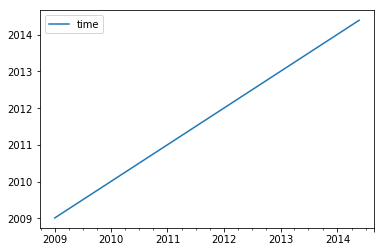

Column name 1


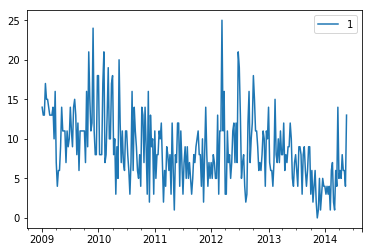

Column name 2


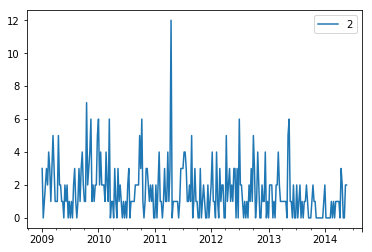

Column name 3


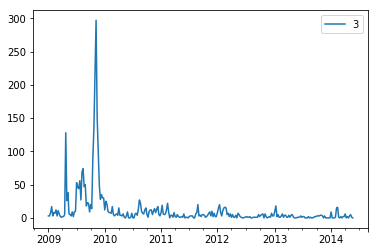

Column name 4


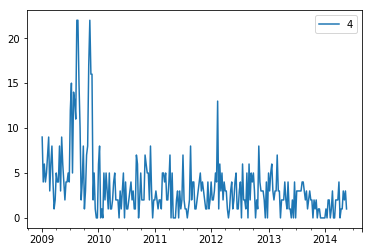

Column name 5


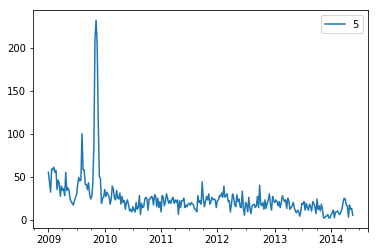

Column name 6


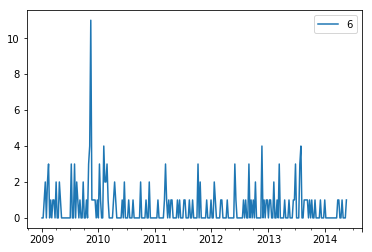

Column name 7


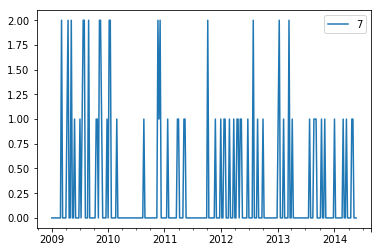

Column name 8


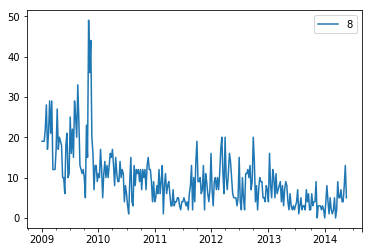

Column name 9


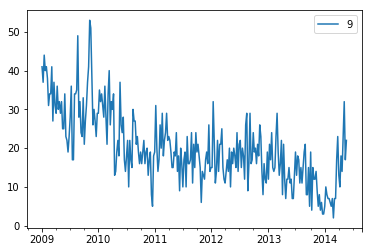

Column name 10


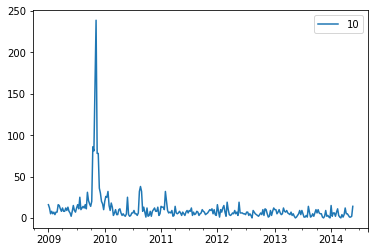

Column name 11


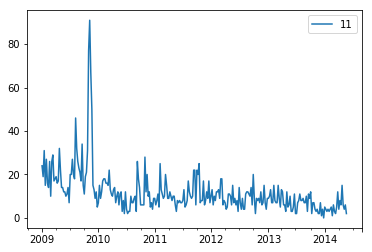

Column name target


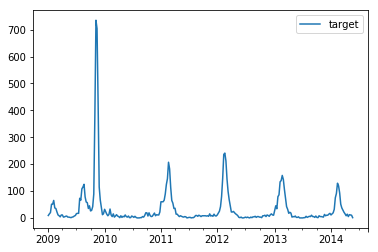

Column name tm_year


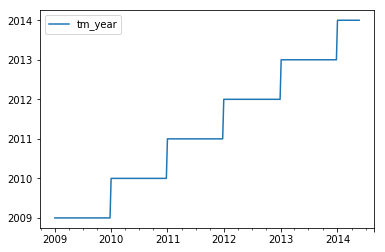

Column name tm_mon


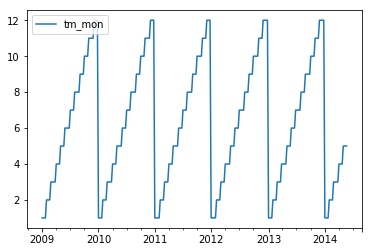

Column name tm_mday


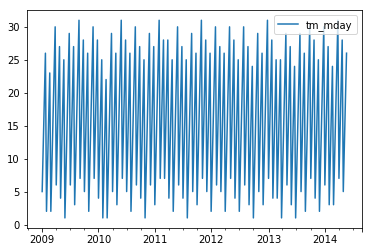

Column name tm_yday


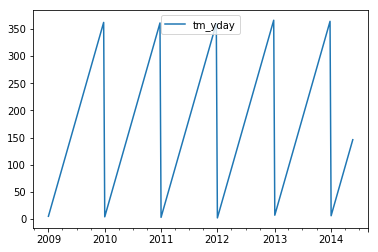

In [58]:
plot_ts(train_set)

Seems that we have a big outlier here

Column name time


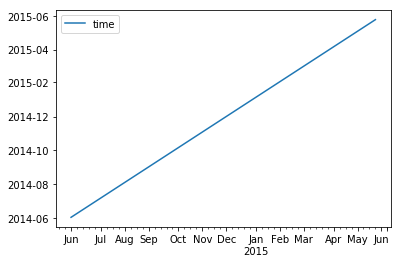

Column name 1


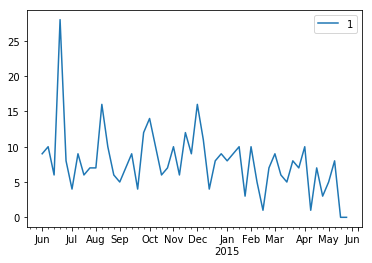

Column name 2


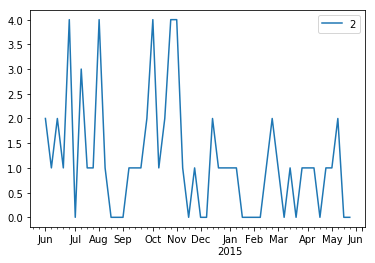

Column name 3


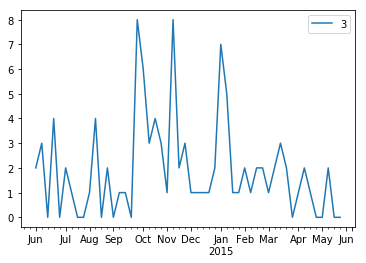

Column name 4


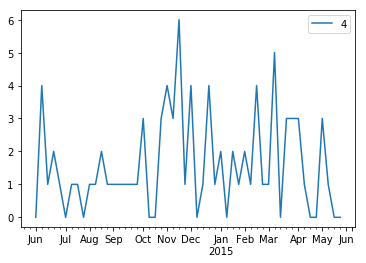

Column name 5


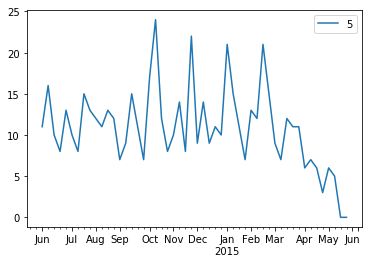

Column name 6


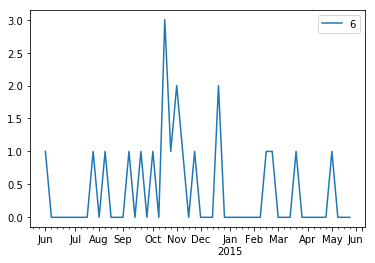

Column name 7


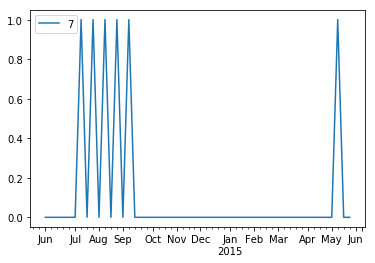

Column name 8


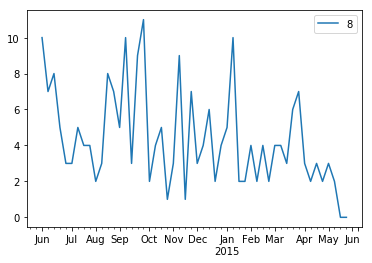

Column name 9


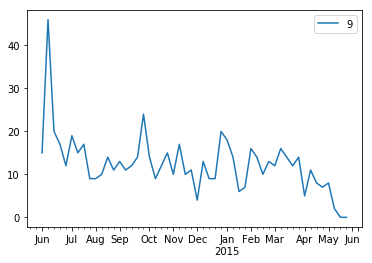

Column name 10


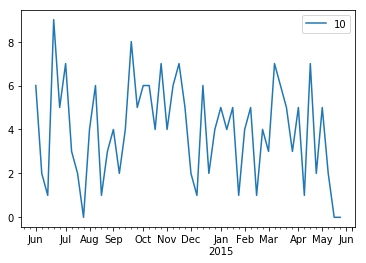

Column name 11


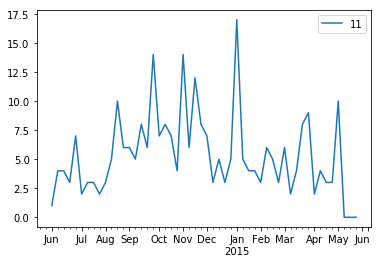

Column name tm_year


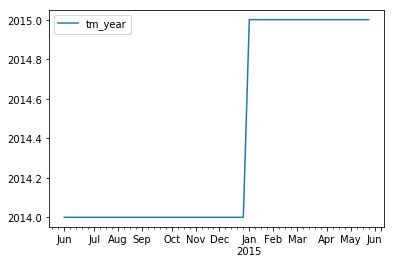

Column name tm_mon


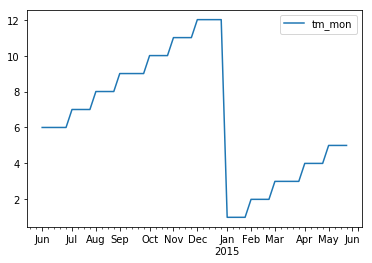

Column name tm_mday


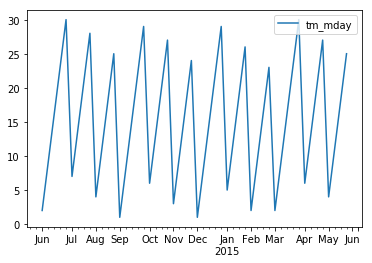

Column name tm_yday


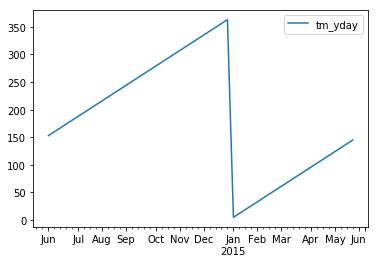

In [60]:
plot_ts(test_set)

## Compare train and test

In [24]:
def comare_df(df1, df2):
    for col in df1.columns:
        if col in df2.columns:
            ind = df1[col].isin(df2[col]) & df2[col].isin(df1[col])
            print(col, sum(ind))

In [25]:
comare_df(train_set, test_set)

time 0
1 38
2 47
3 17
4 30
5 5
6 50
7 44
8 10
9 4
10 17
11 15
tm_year 0
tm_mon 52
tm_mday 51
tm_yday 0


`tm_yday 0` :)

## Categorical

In [26]:
cat_cols = [7, 6, 'tm_mday', 'tm_yday', 'tm_mon', 'tm_year']
num_cols = [col for col in train_set.columns if col not in cat_cols and col != 'time' and col != 'target']

Not sure about 6.

## Feature importance

In [27]:
from sklearn.feature_selection import f_regression, mutual_info_regression
from xgboost import XGBRegressor

In [28]:
X = train_set[[col for col in train_set.columns if col != 'target' and col != 'time']].values
y = train_set['target'].values

In [29]:
def make_importance_df(f, X, y):
    result = f(X=X, y=y)
    return pd.concat((pd.DataFrame(result[0], index = train_set[[col for col in train_set.columns if col != 'target' and col != 'time']].columns, columns=['F-value']),
                      pd.DataFrame(result[1], train_set[[col for col in train_set.columns if col != 'target' and col != 'time']].columns, columns=['p-value']).apply(lambda x: round(x, 5))
                      ), axis=1).sort_values(by = ['F-value'], ascending=False)

In [30]:
make_importance_df(f_regression, X, y)

,F-value,p-value
5,400.988749,0.00000
3,310.765193,0.00000
10,283.936785,0.00000
11,213.746439,0.00000
4,112.638876,0.00000
8,71.618317,0.00000
6,64.479365,0.00000
9,35.807289,0.00000
7,15.154184,0.00012
1,6.159041,0.01366


In [31]:
make_importance_df(mutual_info_regression, X, y)

/home/denis/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


,F-value,p-value
1,0.041984,0.0
2,0.041984,0.0
3,0.041984,0.0
4,0.041984,0.0
5,0.041984,0.0
6,0.041984,0.0
7,0.041984,0.0
8,0.041984,0.0
9,0.041984,0.0
10,0.041984,0.0


In [32]:
pd.DataFrame(XGBRegressor().fit(X, y).feature_importances_, index = train_set[[col for col in train_set.columns if col != 'target' and col != 'time']].columns, columns=['F-value']).sort_values(by = ['F-value'], ascending=False)

,F-value
tm_yday,0.248722
5,0.156729
1,0.095400
tm_year,0.074957
2,0.069847
3,0.068143
tm_mon,0.054514
4,0.049404
tm_mday,0.045997
8,0.034072


## Correlation

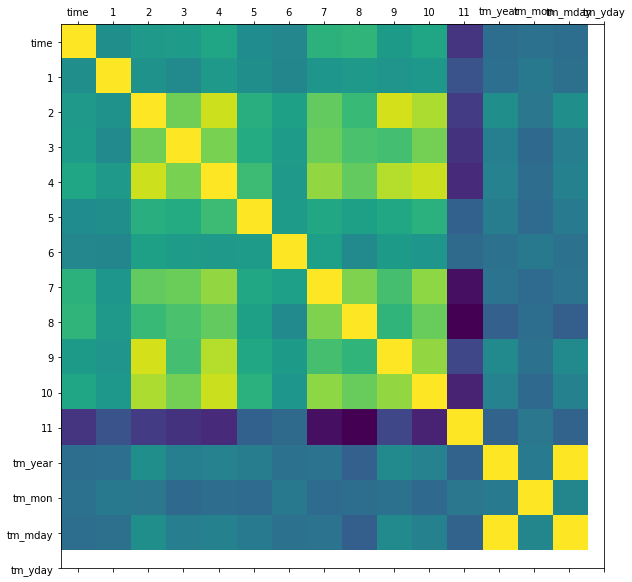

In [33]:
fig, ax = plt.subplots(figsize=(20,10))
ax.matshow(train_set[[col for col in train_set.columns if col != 'target' and col != 'time']].corr())
plt.xticks(range(len(test_set.columns)), test_set.columns)
plt.yticks(range(len(test_set.columns)), test_set.columns)
#plt.colorbar()
plt.show()

# Save

In [34]:
np.save('data/X', arr=X)
np.save('data/y', arr=y)

In [35]:
train_set[cat_cols].to_csv('data/train_cat_cols.csv', index = False)
train_set[num_cols].to_csv('data/train_num_cols.csv', index = False)

In [36]:
np.save('data/X_test', test_set[[col for col in train_set.columns if col != 'target' and col != 'time']].values)

In [37]:
test_set[cat_cols].to_csv('data/test_cat_cols.csv', index = False)
test_set[num_cols].to_csv('data/test_num_cols.csv', index = False)

In [66]:
pd.DataFrame(train_set['target'].values, index = pd.to_datetime(train_set['time']).values, columns = ['target']).to_csv('data/train_target.csv')
pd.DataFrame([0 for i in range(len(test_set))],index = pd.to_datetime(test_set['time']).values, columns = ['null']).to_csv('data/test_target.csv')